## Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Preprocessing the dataset

In [4]:
def remove_pattern(pattern, text):
    r = re.findall(pattern, text)
    for word in r:
        text =  re.sub(word, "", text)
    return text

In [5]:
clean_tweets = df['tweet']

for i, tweet in enumerate(clean_tweets):
    clean_tweets[i] = remove_pattern("@[\w]*", tweet)
print(clean_tweets)

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can't use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate  isz that youuu?ððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     #sikh #temple vandalised in in #calgary, #wso...
31961                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object


In [6]:
df['clean_tweets'] = clean_tweets
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweets
0,1,0,when a father is dysfunctional and is so sel...,when father dysfunctional selfish drags kids i...
1,2,0,thanks for #lyft credit i can't use cause th...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [7]:
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweets
0,1,0,when a father is dysfunctional and is so sel...,when father dysfunctional selfish drags kids i...
1,2,0,thanks for #lyft credit i can't use cause th...,thanks #lyft credit can t cause they don t off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time ur ...
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [8]:
tokens = df['clean_tweets'].apply(lambda x: x.split())
tokens.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can, t, cause, they, d...
2                              [bihday, your, majesty]
3                 [#model, love, take, with, time, ur]
4                   [factsguide, society, #motivation]
Name: clean_tweets, dtype: object

In [9]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokens = tokens.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokens.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can, t, caus, they, don...
2                              [bihday, your, majesti]
3                 [#model, love, take, with, time, ur]
4                         [factsguid, societi, #motiv]
Name: clean_tweets, dtype: object

In [10]:
#return the words back to a sentence
for i in range(len(tokens)):
    tokens[i] = " ".join(tokens[i])
    
df['clean_tweets'] = tokens
df.head()

,id,label,tweet,clean_tweets
0,1,0,when a father is dysfunctional and is so sel...,when father dysfunct selfish drag kid into dys...
1,2,0,thanks for #lyft credit i can't use cause th...,thank #lyft credit can t caus they don t offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time ur
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


## Exploratory data analysis

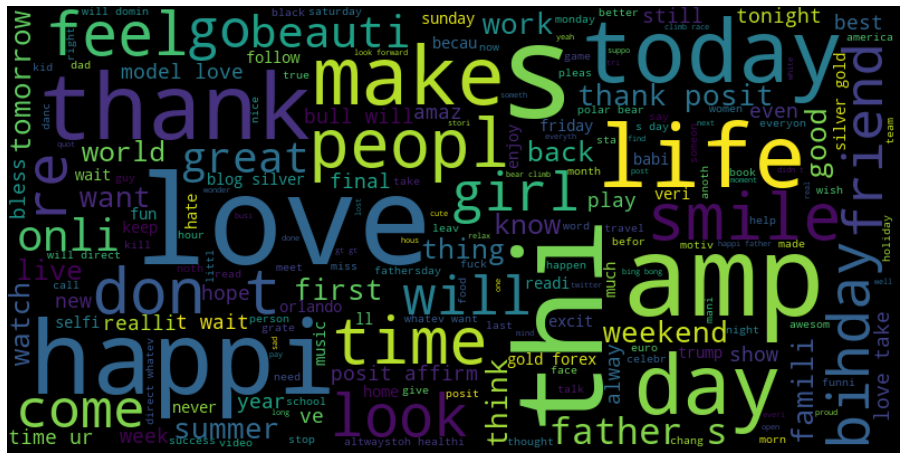

In [25]:
all_words = " ".join([line for line in df['clean_tweets']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 400, random_state=69, max_font_size=120).generate(all_words)

plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

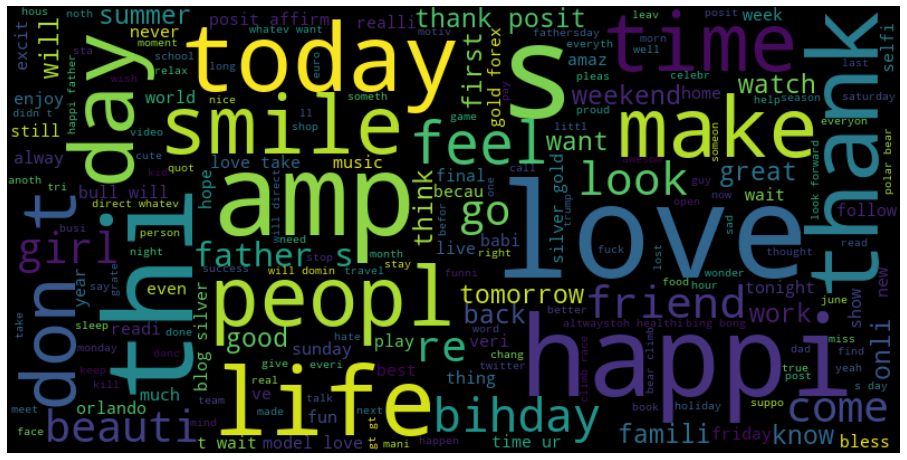

In [26]:
all_positive_words = " ".join([line for line in df['clean_tweets'][df['label']==0]])

wordcloud = WordCloud(width = 800, height = 400, random_state=69, max_font_size=120).generate(all_positive_words)

plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

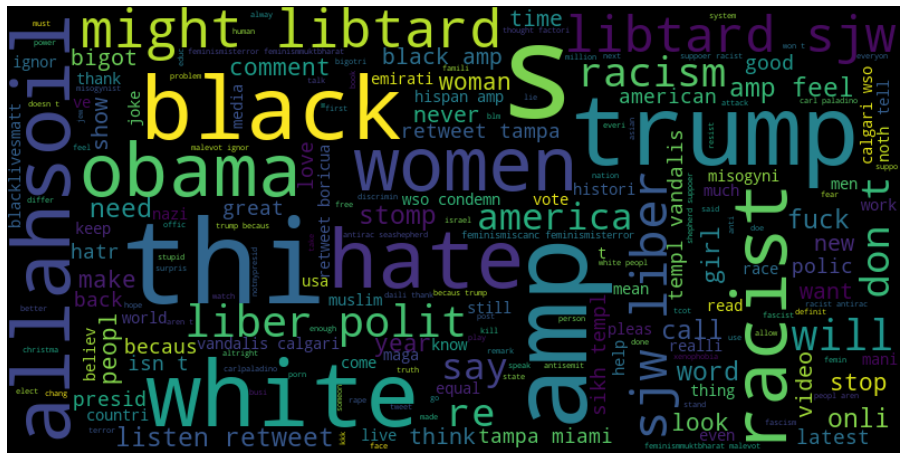

In [27]:
all_negative_words = " ".join([line for line in df['clean_tweets'][df['label']==1]])

wordcloud = WordCloud(width = 800, height = 400, random_state=69, max_font_size=120).generate(all_negative_words)

plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
def get_hashtags(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [37]:
ht_positive = get_hashtags(df['clean_tweets'][df['label']==0])

ht_negative = get_hashtags(df['clean_tweets'][df['label']==1])

In [38]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [39]:
import nltk
freq = nltk.FreqDist(ht_positive)
d_positive = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d_positive.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [40]:
import nltk
freq_negative = nltk.FreqDist(ht_negative)
d_negative = pd.DataFrame({'Hashtag': list(freq_negative.keys()),
                 'Count': list(freq_negative.values())})
d_negative.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


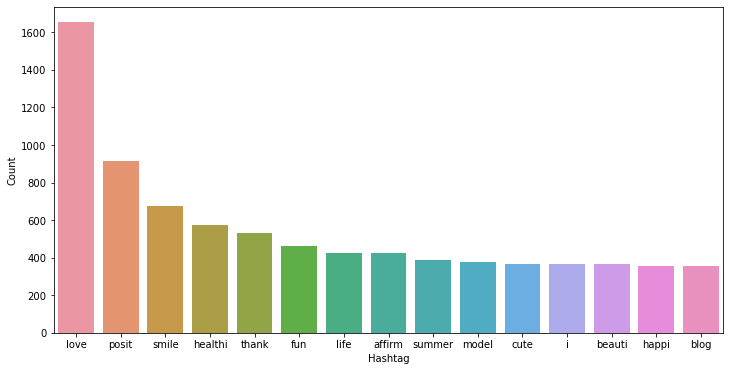

In [49]:
d = d_positive.nlargest(columns='Count', n=15)
plt.figure(figsize=(12,6))
sns.barplot(data = d, x='Hashtag', y='Count')
plt.show()

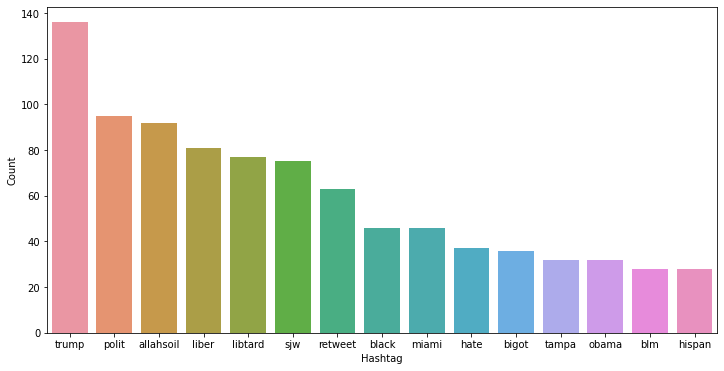

In [50]:
d = d_negative.nlargest(columns='Count', n=15)
plt.figure(figsize=(12,6))
sns.barplot(data = d, x='Hashtag', y='Count')
plt.show()

## Input Split

In [51]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweets'])

In [ ]:
bow[0].toarray()

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], test_size=0.2, random_state=69)

## Model Training

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [56]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [69]:
pred = model.predict(x_test)

In [58]:
f1_score(y_test, pred)

0.4831804281345566

In [59]:
accuracy_score(y_test, pred)

0.9471296730799311

In [61]:
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5415617128463476

In [62]:
accuracy_score(y_test,pred)

0.9430627248553105

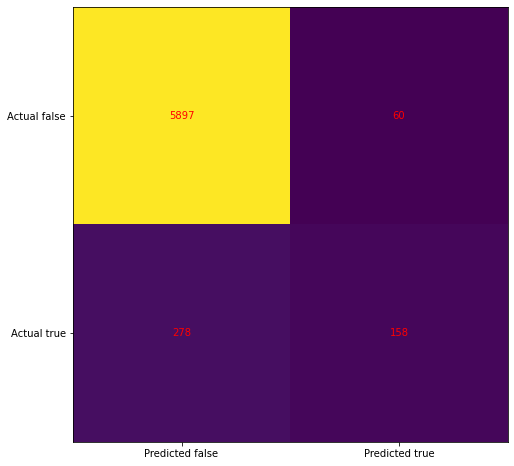

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, model.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted false', 'Predicted true'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual false', 'Actual true'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [68]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5957
           1       0.72      0.36      0.48       436

    accuracy                           0.95      6393
   macro avg       0.84      0.68      0.73      6393
weighted avg       0.94      0.95      0.94      6393



In [70]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.05287032692006882
Mean Squared Error: 0.05287032692006882
Root Mean Squared Error: 0.22993548425606


In [71]:
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df_new.to_csv('predicted_logistic.csv')

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [99]:
pred_rf_np = rf_model.predict(x_test)

In [116]:
pred_rf=list(pred_rf_np)

for i, predic in enumerate(pred_rf):
    if predic>0.5:
        pred_rf[i]=1
    else:
        pred_rf[i]=0

In [117]:
accuracy_score(y_test, pred_rf)

0.9336774597215705

In [1]:
cm = confusion_matrix(y_test, pred_rf)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted false', 'Predicted true'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual false', 'Actual true'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

NameError: name 'confusion_matrix' is not defined